# Pima Indians Diabetes Database
Predict the onset of diabetes based on diagnostic measures

## 1. Importing the data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# ml libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/diabetes.csv")

## 2. Exploratory data analysis (EDA)

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.shape

(768, 9)

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isnull().sum() # number of null/missing values in each column

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
sns.set_style("darkgrid")

In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.Outcome.unique()

array([1, 0], dtype=int64)

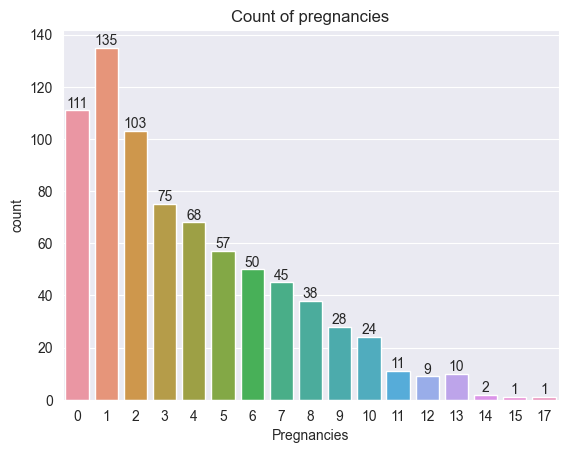

In [12]:
ax= sns.countplot(x="Pregnancies", data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of pregnancies")
plt.show()

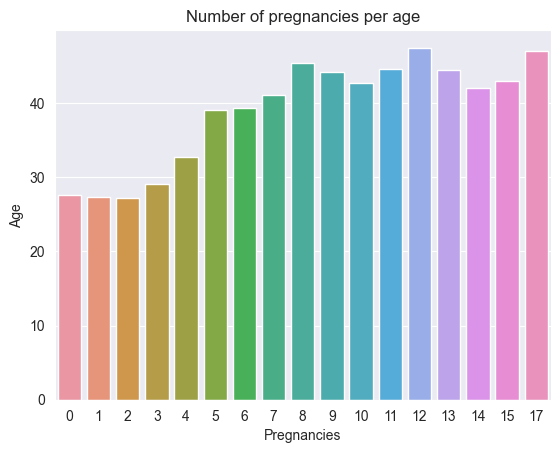

In [13]:
ax= sns.barplot(x="Pregnancies", y="Age", data=df, errorbar=None)
plt.title("Number of pregnancies per age")
plt.show()

<AxesSubplot: xlabel='Age', ylabel='Pregnancies'>

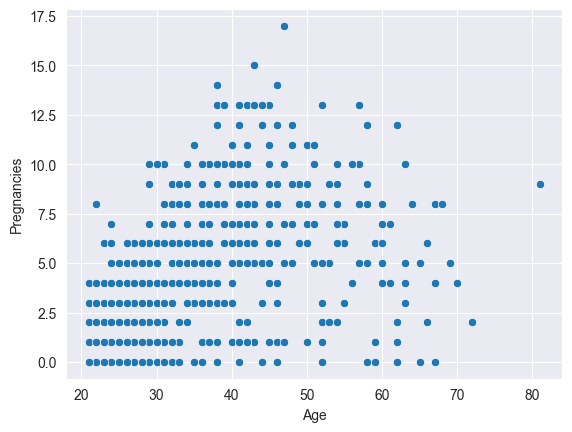

In [14]:
sns.scatterplot(x="Age", y="Pregnancies", data=df)

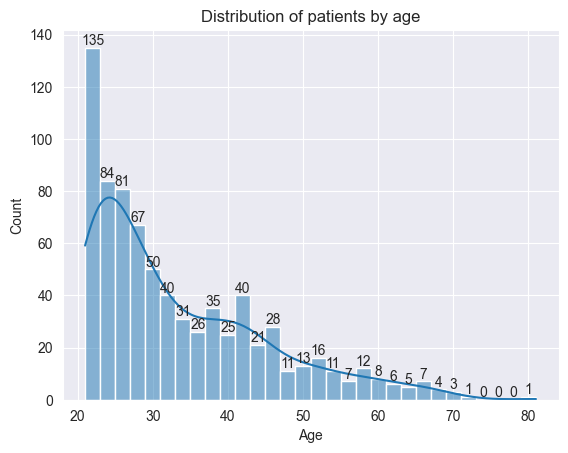

In [15]:
ax= sns.histplot(df["Age"], kde=True, bins=30)
ax.bar_label(ax.containers[1])
plt.title("Distribution of patients by age")
plt.show()

<AxesSubplot: xlabel='BloodPressure', ylabel='Age'>

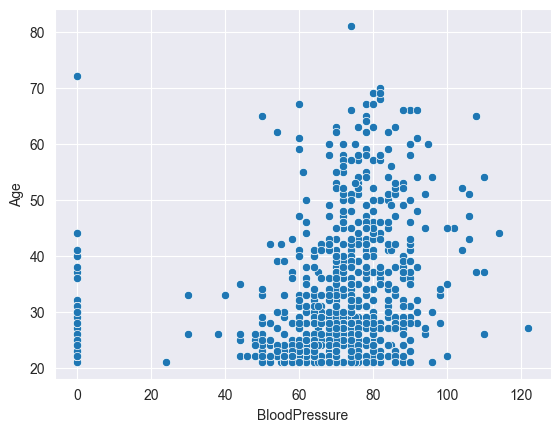

In [16]:
sns.scatterplot(x="BloodPressure", y="Age", data=df)

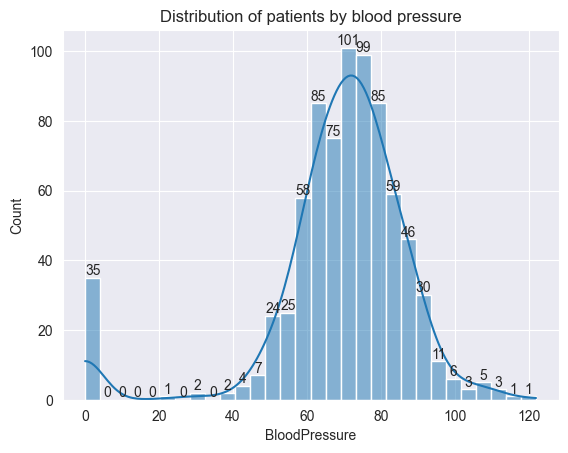

In [17]:
ax= sns.histplot(df["BloodPressure"], kde=True, bins=30)
ax.bar_label(ax.containers[1])
plt.title("Distribution of patients by blood pressure")
plt.show()

<AxesSubplot: xlabel='BMI', ylabel='Age'>

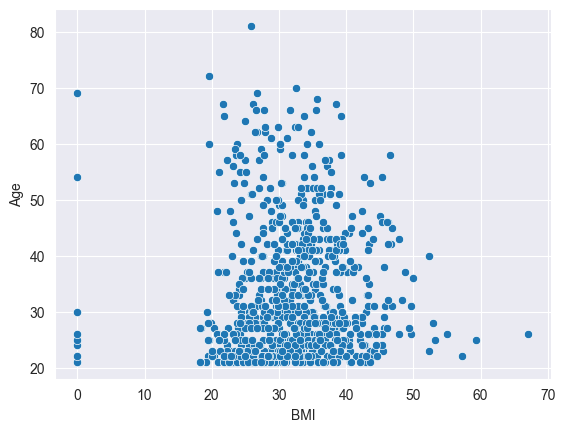

In [18]:
sns.scatterplot(x="BMI", y="Age", data=df)

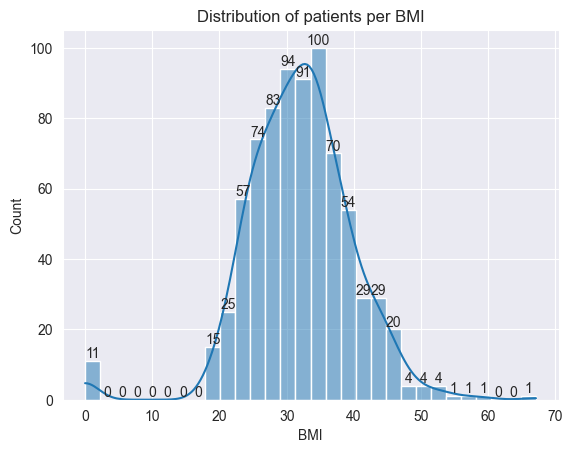

In [19]:
ax= sns.histplot(df["BMI"], kde=True, bins=30)
ax.bar_label(ax.containers[1])
plt.title("Distribution of patients per BMI")
plt.show()

<AxesSubplot: xlabel='Glucose', ylabel='Age'>

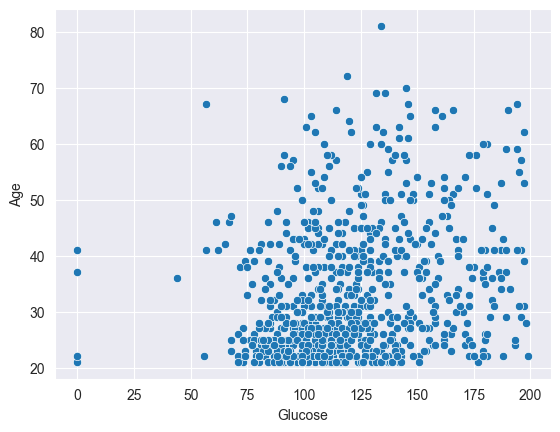

In [20]:
sns.scatterplot(x="Glucose", y="Age", data=df)

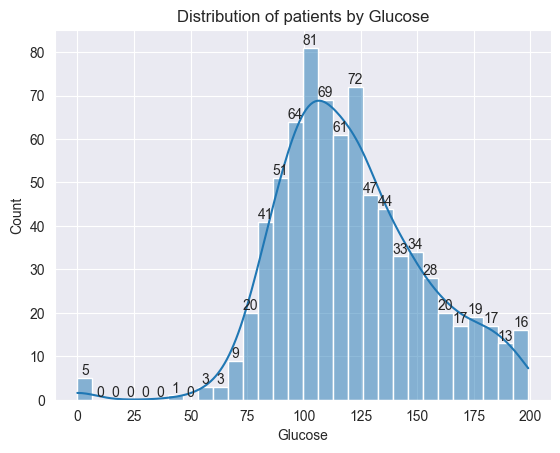

In [21]:
ax= sns.histplot(df["Glucose"], kde=True, bins=30)
ax.bar_label(ax.containers[1])
plt.title("Distribution of patients by Glucose")
plt.show()

<AxesSubplot: xlabel='Age', ylabel='Insulin'>

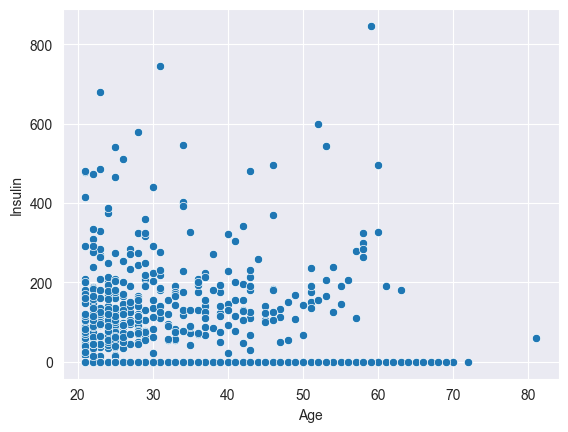

In [22]:
sns.scatterplot(x="Age",y="Insulin", data= df)

In [23]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


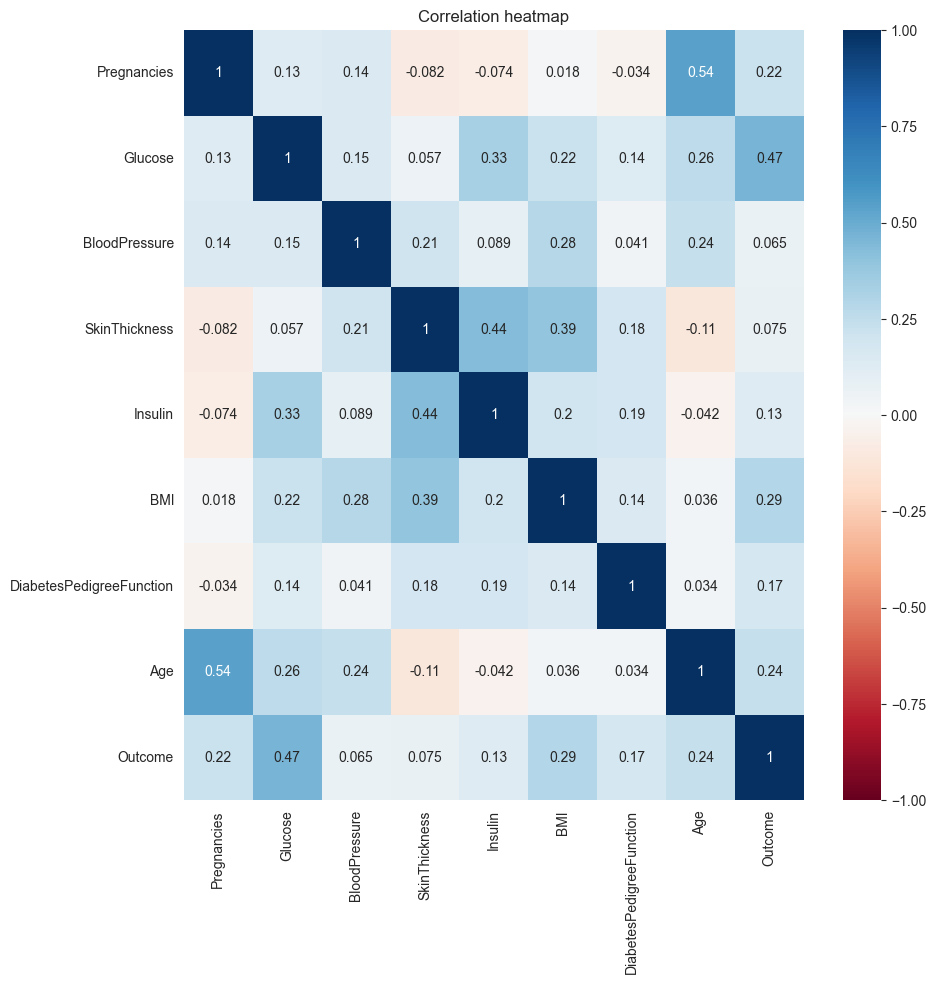

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap="RdBu", vmin=-1, vmax=1, annot=True)
plt.title("Correlation heatmap")
plt.show()

note that there is no multicollinearity and that the variables with the highest correlation are: (Age and Pregnancies) with 0.54, (Glucose and Outcome) with 0.47, (Insulin and SkinThickness) with 0.44

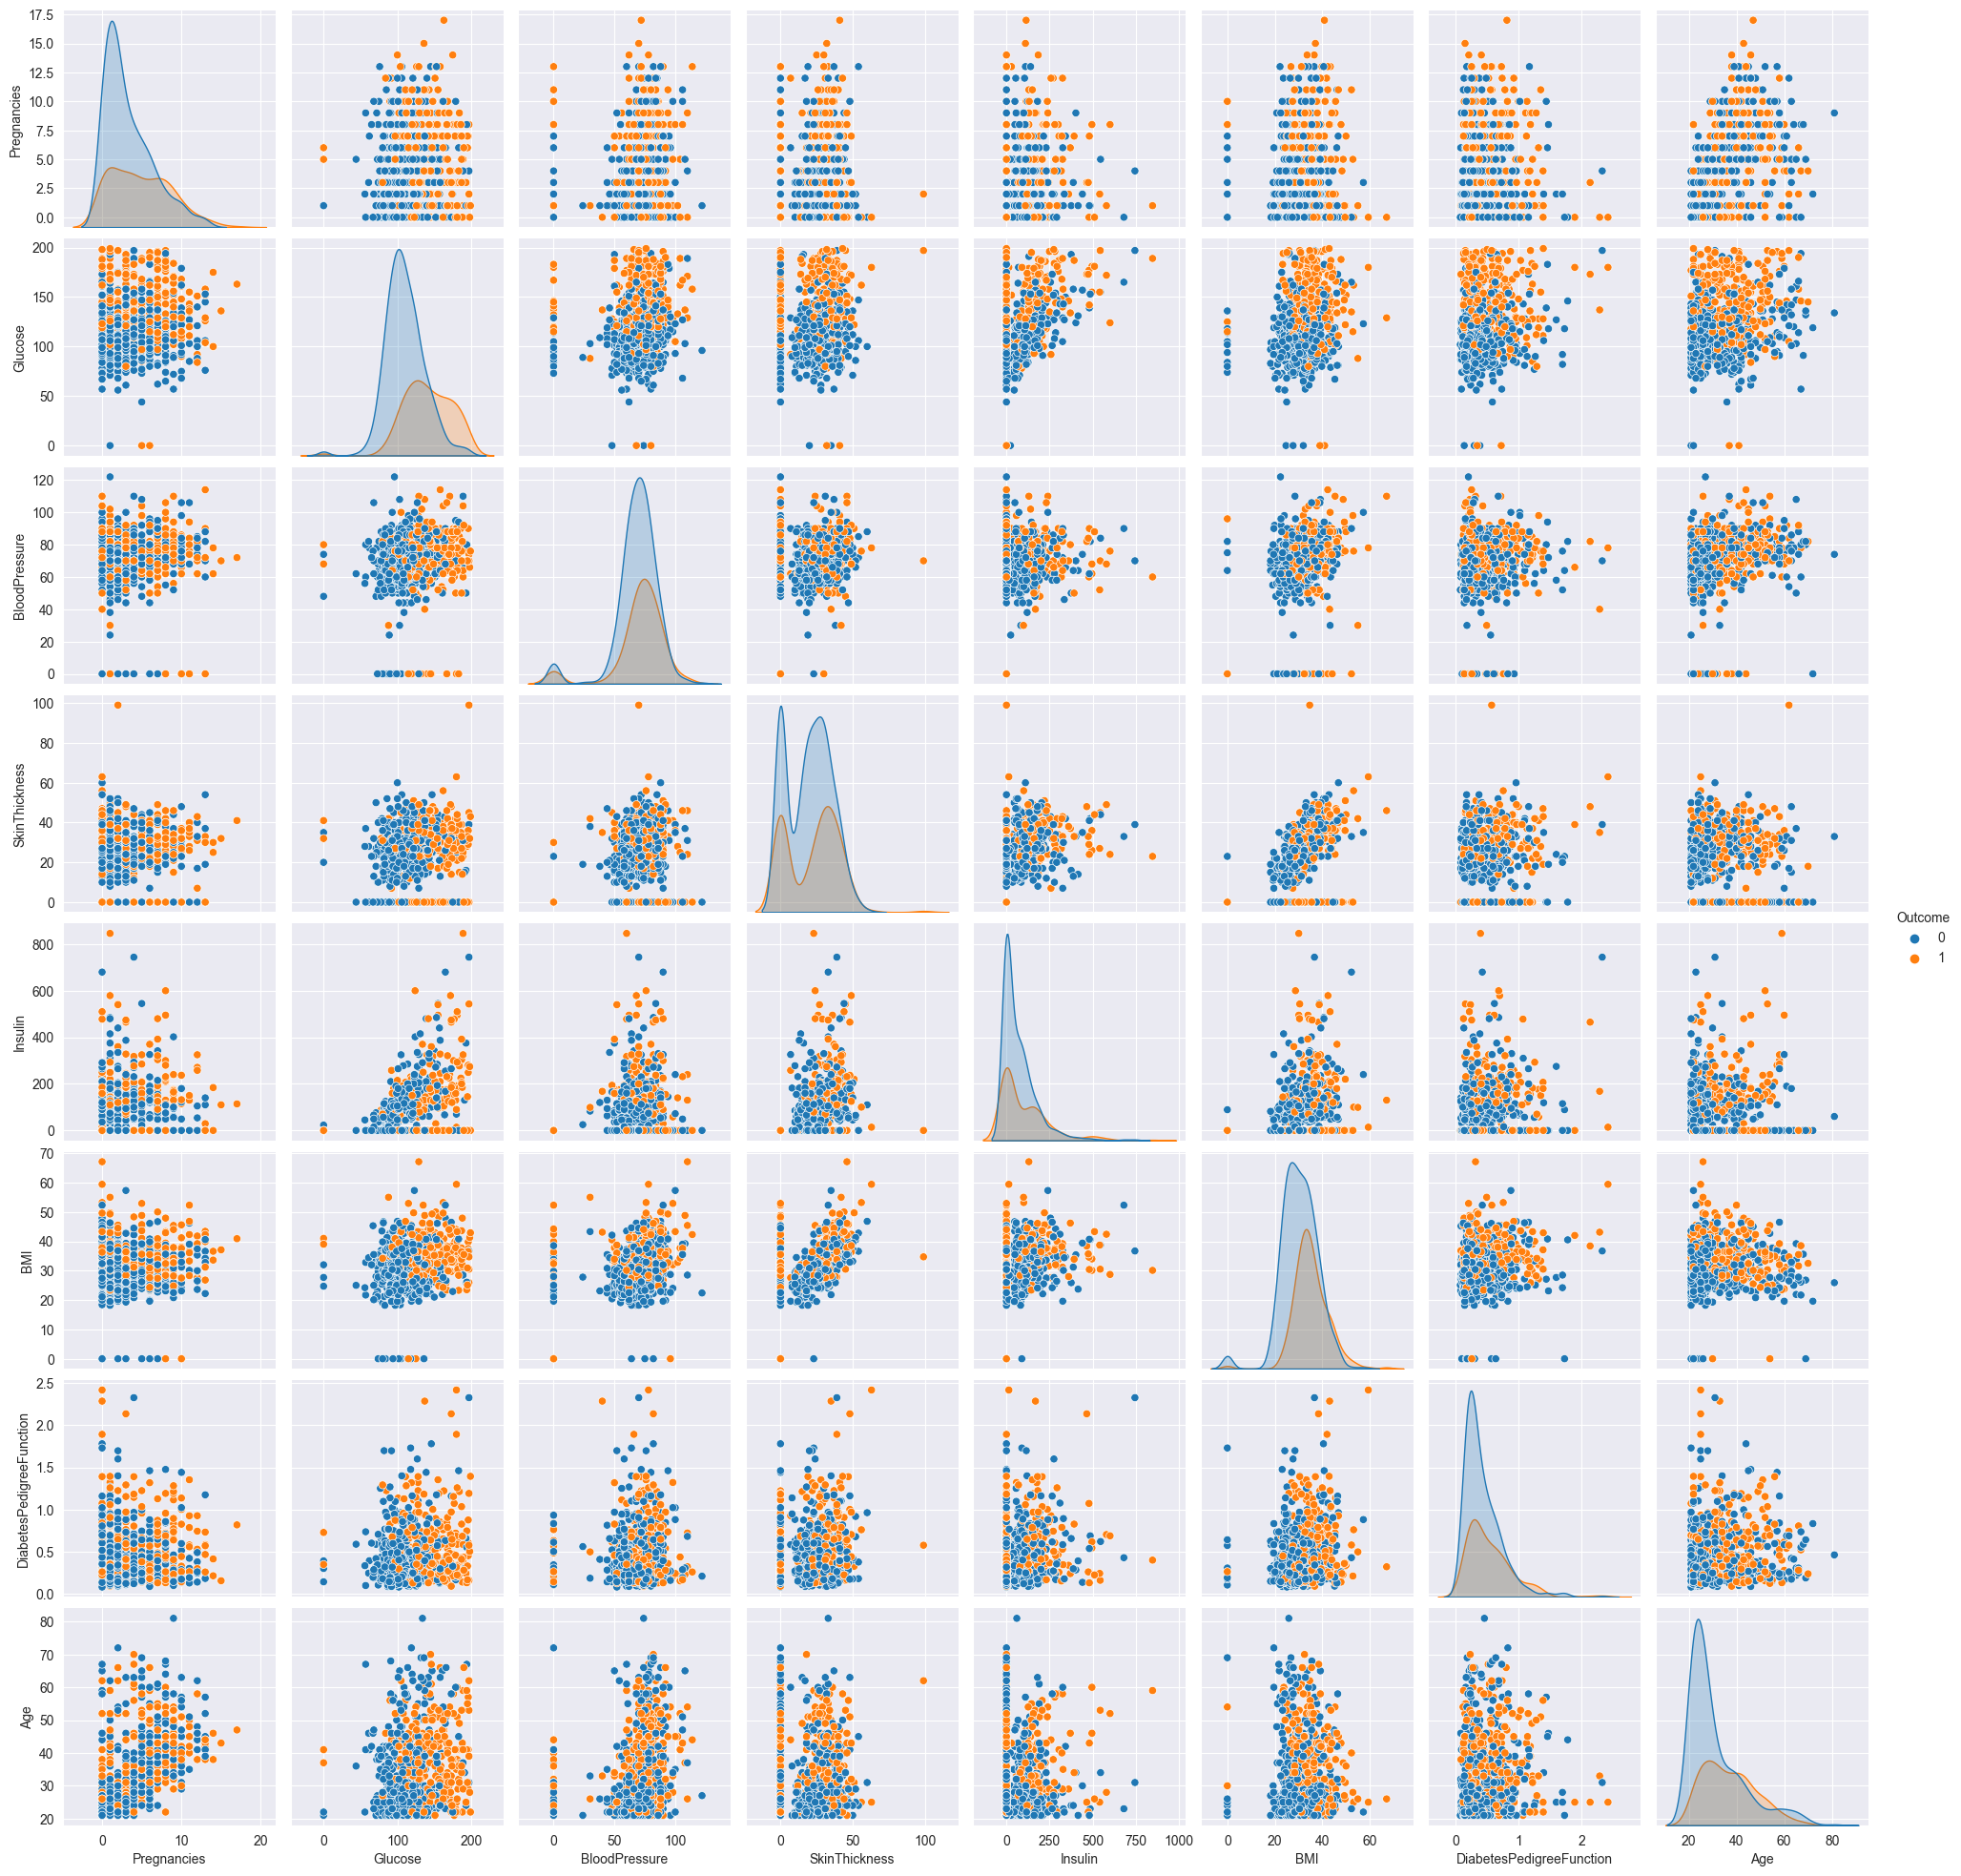

In [25]:
sns.pairplot(data=df, hue="Outcome")

Note that there are no linear patterns so a regression algorithm may not be very accurate.

but you can see how almost all the data is grouped so possibly a classification algorithm like (KNN, decision tree or random forest can be useful to predict if the patient has diabetes or not)

## 3. Building the model

In [26]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

### 3.1 Finding the best model

Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

model1 = lr.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

In [30]:
cm = confusion_matrix(y_test, prediction1)
cm

array([[126,  16],
       [ 44,  45]], dtype=int64)

<AxesSubplot: >

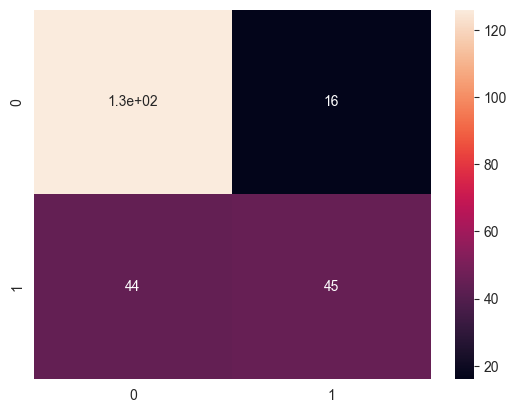

In [31]:
sns.heatmap(cm, annot=True)

In [32]:
model1Accuracy = accuracy_score(y_test, prediction1)
print(f"The logistic regression model an accuracy of: {model1Accuracy}")

The logistic regression model an accuracy of: 0.7402597402597403


In [33]:
print("Classification report of logistic regression: \n", classification_report(y_test, prediction1))

Classification report of logistic regression: 
               precision    recall  f1-score   support

           0       0.74      0.89      0.81       142
           1       0.74      0.51      0.60        89

    accuracy                           0.74       231
   macro avg       0.74      0.70      0.70       231
weighted avg       0.74      0.74      0.73       231



Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

model2 = dtc.fit(X_train, y_train)
prediction2 = model2.predict(X_test)

In [35]:
cm2 = confusion_matrix(y_test, prediction2)
cm2

array([[119,  23],
       [ 36,  53]], dtype=int64)

<AxesSubplot: >

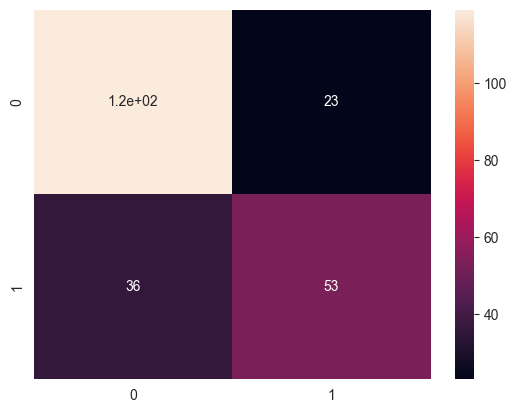

In [36]:
sns.heatmap(cm2, annot=True)

In [37]:
model2Accuracy = accuracy_score(y_test, prediction2)
print(f"The Decision tree model an accuracy of: {model2Accuracy}")

The Decision tree model an accuracy of: 0.7445887445887446


In [38]:
print("Classification report of Decision Tree: \n", classification_report(y_test, prediction2))

Classification report of Decision Tree: 
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       142
           1       0.70      0.60      0.64        89

    accuracy                           0.74       231
   macro avg       0.73      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()

model3 = rfc.fit(X_train,y_train)
prediction3 = model3.predict(X_test)

In [40]:
cm3 = confusion_matrix(y_test, prediction3)
cm3

array([[132,  10],
       [ 39,  50]], dtype=int64)

<AxesSubplot: >

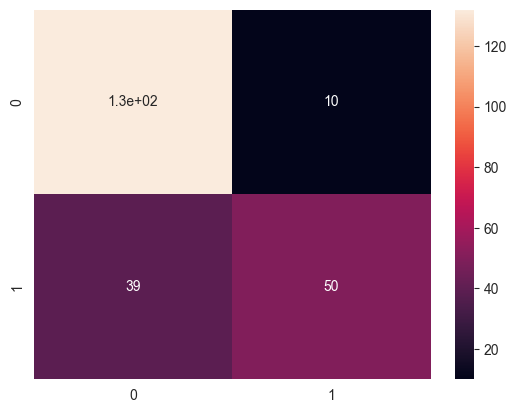

In [41]:
sns.heatmap(cm3, annot=True)

In [42]:
model3Accuracy = accuracy_score(y_test, prediction3)
print(f"The Random forest model an accuracy of: {model3Accuracy}")

The Random forest model an accuracy of: 0.7878787878787878


In [43]:
print("Classification report of Random forest: \n", classification_report(y_test, prediction3))

Classification report of Random forest: 
               precision    recall  f1-score   support

           0       0.77      0.93      0.84       142
           1       0.83      0.56      0.67        89

    accuracy                           0.79       231
   macro avg       0.80      0.75      0.76       231
weighted avg       0.80      0.79      0.78       231



K-nearest neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

model4 = knn.fit(X_train, y_train)
prediction4 = model4.predict(X_test)

In [45]:
cm4 = confusion_matrix(y_test, prediction4)
cm4

array([[123,  19],
       [ 41,  48]], dtype=int64)

<AxesSubplot: >

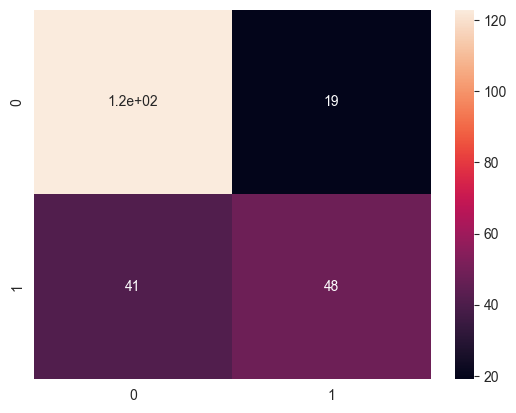

In [46]:
sns.heatmap(cm4, annot=True)

In [47]:
model4Accuracy = accuracy_score(y_test, prediction4)
print(f"The Random forest model an accuracy of: {model4Accuracy}")

The Random forest model an accuracy of: 0.7402597402597403


In [48]:
print("Classification report of Random forest: \n", classification_report(y_test, prediction4))

Classification report of Random forest: 
               precision    recall  f1-score   support

           0       0.75      0.87      0.80       142
           1       0.72      0.54      0.62        89

    accuracy                           0.74       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.74      0.73       231



In [1]:
from joblib import dump, load

In [ ]:
# dump(model3, "randomForest-model.joblib")

In [2]:
finalModel= load("randomForest-model.joblib")

In [46]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
predictions = finalModel.predict([[6, 210, 120, 18, 33, 22, 0.600, 42]])
predictions

array([1], dtype=int64)

In [5]:
def hasDiabetes(pred):
    if pred == 1:
        print("The patient has diabetes")
    else:
        print("The patient doesn't have diabetes")

In [6]:
hasDiabetes(predictions)

The patient has diabetes


In [7]:
predictions = finalModel.predict([[0, 60, 60, 23, 70, 27, 0.167, 21]])
predictions

array([0], dtype=int64)

In [8]:
hasDiabetes(predictions)

The patient doesn't have diabetes
